## Drug legalization
Drug legalization calls for a return to pre-1906 Pure Food and Drug Act attitudes when almost all drugs were legal. This would require ending government-enforced prohibition on the distribution or sale and personal use of specified (or all) currently banned drugs. Proposed ideas range from full legalization which would completely remove all forms of government control, to various forms of regulated legalization, where drugs would be legally available, but under a system of government control which might mean for instance:[5]

Mandated labels with dosage and medical warnings.
Restrictions on advertising.
Age limitations.
Restrictions on amount purchased at one time.
Requirements on the form in which certain drugs would be supplied.
Ban on sale to intoxicated persons.
Special user licenses to purchase particular drugs.
A possible clinical setting for the consumption of some intravenous drugs and/or supervised consumption.
The regulated legalization system would probably have a range of restrictions for different drugs, depending on their perceived risk, so while some drugs would be sold over the counter in pharmacies or other licensed establishments, drugs with greater risks of harm might only be available for sale on licensed premises where use could be monitored and emergency medical care made available. Examples of drugs with different levels of regulated distribution in most countries include: caffeine (coffee, tea), nicotine (tobacco),[6] and ethyl alcohol (beer, wine, spirits).

Full legalization is often proposed by groups such as libertarians who object to drug laws on moral grounds, while regulated legalization is suggested by groups such as Law Enforcement Against Prohibition who object to the drug laws on the grounds that they fail to achieve their stated aims and instead greatly worsen the problems associated with use of prohibited drugs, but who acknowledge that there are harms associated with currently prohibited drugs which need to be minimized. Not all proponents of drug re-legalization necessarily share a common ethical framework, and people may adopt this viewpoint for a variety of reasons. In particular, favoring drug legalization does not imply approval of drug use.[7][8][9] Since each country has its own regulations and most distinguish between different classes of drugs, there can be difficulties when it come to regulating which should be more readily accessible, since a particular drug criminalized in one area might be completely acceptable elsewhere.

## Drug decriminalization
Drug decriminalization calls for reduced control and penalties compared to existing laws. Proponents of drug decriminalization generally support the use of fines or other punishments to replace prison terms, and often propose systems whereby illegal drug users who are caught would be fined, but would not receive a permanent criminal record as a result. A central feature of drug decriminalization is the concept of harm reduction.

Drug decriminalization is, in some ways, an intermediate between prohibition and legalization. Decriminalization has been criticized as being "the worst of both worlds".[by whom?] This argument assumes that drug sales would still be illegal, thus perpetuating the problems associated with leaving the production and distribution of drugs as an unregulated practice. Critics go on to say that this lack of regulation would effectively work to encourage illegal drug use by removing the criminal penalties that might otherwise cause some people to choose not to use drugs.

Many[who?] argue that the full decriminalization of the possession (or in some cases even distribution) of drugs would redirect the focus of any given law enforcement system to put more effort into arresting criminals instead of citizens who have been previously criminalized for the mere possession of drugs. Taking this view, drug users in particular would be seen by the state as citizens suffering from the disease addiction rather than perpetrators of any given crime.[citation needed]

In 2001 Portugal began treating use and possession of small quantities of drugs as a public health issue.[10] Rather than incarcerating those in possession, they are referred to a treatment program by a regional panel composed of social workers, medical professionals, and drug experts. [1] This also decreases the amount of money the government spends fighting a war on drugs and money spent keeping drug users incarcerated. HIV infection rates also have dropped from 104.2 new cases per million in 2000 to 4.2 cases per million in 2015. "As noted by the EMCDDA, across Europe in the last decades, there has been a movement toward "an approach that distinguishes between the drug trafficker, who is viewed as a criminal, and the drug user, who is seen more as a sick person who is in need of treatment" (EMCDDA 2008, 22).6 A number of Latin American countries have similarly moved to reduce the penalties associated with drug use and personal possession" (Laqueur, 2015, p. 748). Portugal is the first country that has decriminalized the possession of small amounts of drugs, to positive results.[11] Anyone caught with any type of drug in Portugal, if it is for personal consumption, will not be imprisoned.

HYPOTHESES:
- Is dedrug decriminalisation is the worst of both worlds 
- Does legalising a drug reduce crime in the legalising-country? What about in the drug exporting country? 
- Does legalising drugs affect addiction? What is the direct and indirect effect of drug addiction on wellbeing? 

We are interested in evaluating the cost-effectiveness of policy reform to liberalise drugs in high-income countries. To know the impact of liberalisation, we need to answer several questions. 

In [2]:
# librerias que pueda necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Organizacion Datasets de OUR WORLD
# Entity = country como Index

death_rates = pd.read_csv("../Nic_Data/Nic_DataBasura/death-rates-from-drug-use-disorders.csv", index_col='Entity')
death_rates.index.name = None
# Acortar nomber de columnas muy largos
death_rates.rename(columns={'Deaths - Drug use disorders - Sex: Both - Age: Age-standardized (Rate)': 'Death Rates'}, inplace=True)

death_number = pd.read_csv("../Nic_Data/Nic_DataBasura/deaths-from-drug-use-disorders.csv", index_col='Entity')
death_number.index.name = None
death_number.rename(columns={'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)': 'Num Deaths'}, inplace=True)

number_disorders = pd.read_csv("../Nic_Data/Nic_DataBasura/number-with-drug-use-disorders-country.csv", index_col='Entity')
number_disorders.index.name = None
number_disorders.rename(columns={'Prevalence - Drug use disorders - Sex: Both - Age: All Ages (Number)': 'Num Disorders'}, inplace=True)

In [4]:
# Limpieza de datos 
# Delte rows that don't belong to info of a country: World Bank Income Levels, World Bank Regions, Four World Regions, WHO region, World OWID_WRL
death_number = death_number.dropna(axis=0, subset=['Code'])
death_number = death_number.mask(death_number['Code'] == 'OWID_WRL')

number_disorders = number_disorders.dropna(axis=0, subset=['Code'])
number_disorders = number_disorders.mask(number_disorders['Code'] == 'OWID_WRL')

death_rates = death_rates.dropna(axis=0, subset=['Code'])
death_rates = death_rates.mask(death_rates['Code'] == 'OWID_WRL')

In [5]:
# Filtrar para buscar solo datos europeos

death_number = death_number.dropna(axis=0, subset=['Code'])
death_number = death_number.mask(death_number['Code'] == 'OWID_WRL')

number_disorders = number_disorders.dropna(axis=0, subset=['Code'])
number_disorders = number_disorders.mask(number_disorders['Code'] == 'OWID_WRL')

death_rates = death_rates.dropna(axis=0, subset=['Code'])
death_rates = death_rates.mask(death_rates['Code'] == 'OWID_WRL')

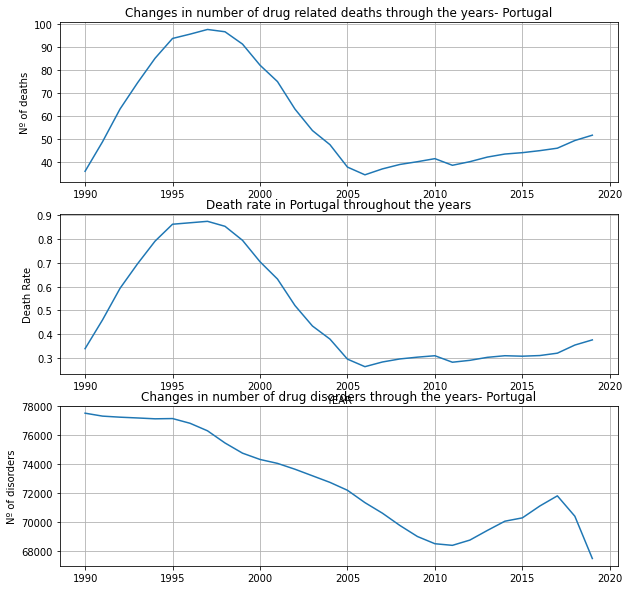

In [7]:
# Plot de numero de muertes, rate de muertes y numero de trastornos en portugal 

# Asignar variables:
death_number_portugal = death_number.loc['Portugal']
death_rates_portugal = death_rates.loc['Portugal']
number_disorders_portugal = number_disorders.loc['Portugal']

# Lineplot utilizando MATPLOTLIB
fig, ax = plt.subplots(3, figsize=(10,10))

ax[1].set_xlabel('YEAR')
ax[0].set_ylabel('Nº of deaths')
ax[1].set_ylabel('Death Rate')
ax[2].set_ylabel('Nº of disorders')
ax[0].title.set_text('Changes in number of drug related deaths through the years- Portugal')
ax[1].title.set_text('Death rate in Portugal throughout the years')
ax[2].title.set_text('Changes in number of drug disorders through the years- Portugal')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].plot((death_number_portugal['Year']),(death_number_portugal['Num Deaths']))
ax[1].plot((death_rates_portugal['Year']),(death_rates_portugal['Death Rates']))
ax[2].plot((number_disorders_portugal['Year']),(number_disorders_portugal['Num Disorders']))

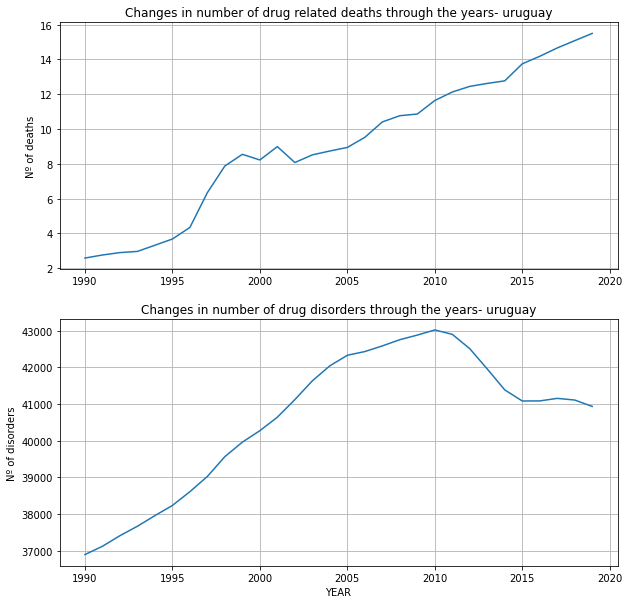

In [8]:
# Repeticion del mismo codigo para Uruguay, tambien decriminalizado
death_number_uruguay = death_number.loc['Uruguay']
death_rates_uruguay = death_rates.loc['Uruguay']
number_disorders_uruguay = number_disorders.loc['Uruguay']

fig, ax = plt.subplots(2, figsize=(10,10))

ax[1].set_xlabel('YEAR')
ax[0].set_ylabel('Nº of deaths')
ax[1].set_ylabel('Nº of disorders')
ax[0].title.set_text('Changes in number of drug related deaths through the years- uruguay')
ax[1].title.set_text('Changes in number of drug disorders through the years- uruguay')

ax[0].grid()
ax[1].grid()

ax[0].plot((death_number_uruguay['Year']),(death_number_uruguay['Num Deaths']))
ax[1].plot((number_disorders_uruguay['Year']),(number_disorders_uruguay['Num Disorders']))

In [ ]:
# Igual para Canada

death_number_canada = death_number.loc['Canada']
death_rates_canada = death_rates.loc['Canada']
number_disorders_canada = number_disorders.loc['Canada']

fig, ax = plt.subplots(2, figsize=(10,10))

ax[1].set_xlabel('YEAR')
ax[0].set_ylabel('Nº of deaths')
ax[1].set_ylabel('Nº of disorders')
ax[0].title.set_text('Changes in number of drug related deaths through the years- canada')
ax[1].title.set_text('Changes in number of drug disorders through the years- canada')

ax[0].grid()
ax[1].grid()

ax[0].plot((death_number_canada['Year']),(death_number_canada['Num Deaths']))
ax[1].plot((number_disorders_canada['Year']),(number_disorders_canada['Num Disorders']))

In [10]:
# exploracion del resto de datos del mundocentrandome en numero de muertes y numero de trastornos
# Top muertes 
death_number_country_sorted = death_number.groupby(['Code'])['Num Deaths'].sum().sort_values(ascending=False)
# Top numero trastornos
number_disorders_country_sorted = number_disorders.groupby(['Code'])['Num Disorders'].sum().sort_values(ascending=False)

In [11]:
death_number_country_sorted

Code
USA    800798.223145
CHN    626917.000367
RUS    259450.899326
IND    168926.867608
IRN     76170.816373
           ...      
SMR         1.750519
TUV         1.740805
COK         1.326632
NIU         0.360888
TKL         0.182952
Name: Num Deaths, Length: 204, dtype: float64

In [12]:
number_disorders_country_sorted 

Code
CHN    2.827945e+08
USA    2.287580e+08
IND    1.565302e+08
BRA    6.254796e+07
RUS    5.702249e+07
           ...     
COK    4.179341e+03
NRU    2.338783e+03
TUV    2.134649e+03
NIU    3.799448e+02
TKL    2.808644e+02
Name: Num Disorders, Length: 204, dtype: float64

In [13]:
# create data frame with only info from EU countries

EU_countries = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark","Estonia", "Finland", "France", "Germany", "Greece", "Hungary","Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"]
EU_dec_countries = ["Poland", "Germany", "Netherlands", "Portugal", "Spain", "Czechia", "Croatia", "Italy"]
death_rates_19 = death_rates[death_rates['Year']== 2019]
death_rate_EU_19 = death_rates_19.loc[EU_countries]

In [14]:
## Encontrar paises donde el numero de trastornos esta por debajo de la media

disorder_number_19 = number_disorders[number_disorders['Year']== 2019]
disorder_number_EU_19 = disorder_number_19.loc[EU_countries]
# disorder_number_EU_19.mean()
for country in EU_dec_countries: 
    if disorder_number_EU_19.loc[country]['Num Disorders'] < 54553.6368 :
        print('{}'.format(country))

Croatia


In [15]:
## FIltrar por muertes en 2019 numero muertes
death_number_19 = death_number[death_number['Year']== 2019]
death_number_EU_19 = death_number_19.loc[EU_countries]
death_number_EU_19.sort_values('Num Deaths', ascending=False)
# numero trastornos
disorder_number_EU_19.sort_values('Num Disorders', ascending=False)

,Code,Year,Num Disorders
Germany,DEU,2019.0,709400.179175
France,FRA,2019.0,635752.018298
Spain,ESP,2019.0,598324.278692
Italy,ITA,2019.0,460283.372921
Poland,POL,2019.0,266904.673946
Netherlands,NLD,2019.0,158649.515313
Belgium,BEL,2019.0,106717.031335
Czechia,CZE,2019.0,92869.017302
Austria,AUT,2019.0,85885.283493
Sweden,SWE,2019.0,73708.923202


In [16]:
# Crear data_frame con años de interes

death_rate_EU_by_year = {}
year_range = list(range(1990,2020,1))

for year in year_range:
    death_rate_EU_by_year['death_rate_EU_{}'.format(year)] = death_rates[death_rates['Year']== year].loc[EU_countries]['Death Rates']

death_rate_EU_by_year = pd.DataFrame(death_rate_EU_by_year)

In [17]:
for year in year_range : 
    for country in EU_dec_countries: 
        mean = death_rate_EU_by_year['death_rate_EU_{}'.format(year)].mean()
        if death_rate_EU_by_year['death_rate_EU_{}'.format(year)].loc['{}'.format(country)] < mean:
            print(f"In {year} {country}'s number of drug related deaths was lower than the mean")

In 1990 Poland's number of drug related deaths was lower than the mean
In 1990 Netherlands's number of drug related deaths was lower than the mean
In 1990 Portugal's number of drug related deaths was lower than the mean
In 1990 Czechia's number of drug related deaths was lower than the mean
In 1990 Croatia's number of drug related deaths was lower than the mean
In 1991 Poland's number of drug related deaths was lower than the mean
In 1991 Netherlands's number of drug related deaths was lower than the mean
In 1991 Portugal's number of drug related deaths was lower than the mean
In 1991 Czechia's number of drug related deaths was lower than the mean
In 1991 Croatia's number of drug related deaths was lower than the mean
In 1992 Poland's number of drug related deaths was lower than the mean
In 1992 Netherlands's number of drug related deaths was lower than the mean
In 1992 Portugal's number of drug related deaths was lower than the mean
In 1992 Czechia's number of drug related deaths was 

In [ ]:
## Con numero de muertes

death_number_EU_by_year = {}

for year in year_range:
    death_number_EU_by_year['death_number_EU_{}'.format(year)] = death_number[death_number['Year']== year].loc[EU_countries]['Num Deaths']

death_number_EU_by_year = pd.DataFrame(death_number_EU_by_year)

for year in year_range : 
    for country in EU_dec_countries: 
        mean = death_number_EU_by_year['death_number_EU_{}'.format(year)].mean()
        if death_number_EU_by_year['death_number_EU_{}'.format(year)].loc['{}'.format(country)] < mean:
            print(f"In {year} {country}'s number of drug related deaths was lower than the mean")

In [18]:
## mismo para numero de trastornos para ver como se comparan con la media

disorder_number_19 = number_disorders[number_disorders['Year']== 2019]
disorder_number_EU_19 = disorder_number_19.loc[EU_countries]
disorder_number_EU_by_year = {}

for year in year_range:
    disorder_number_EU_by_year['disorder_number_EU_{}'.format(year)] = number_disorders[number_disorders['Year']== year].loc[EU_countries]['Num Disorders']

disorder_number_EU_by_year = pd.DataFrame(disorder_number_EU_by_year)

for year in year_range : 
    for country in EU_dec_countries: 
        mean = disorder_number_EU_by_year['disorder_number_EU_{}'.format(year)].mean()
        if disorder_number_EU_by_year['disorder_number_EU_{}'.format(year)].loc['{}'.format(country)] < mean:
            print(f"In {year} {country}'s number of disorders was lower than the mean")

In 1990 Portugal's number of disorders was lower than the mean
In 1990 Czechia's number of disorders was lower than the mean
In 1990 Croatia's number of disorders was lower than the mean
In 1991 Portugal's number of disorders was lower than the mean
In 1991 Czechia's number of disorders was lower than the mean
In 1991 Croatia's number of disorders was lower than the mean
In 1992 Portugal's number of disorders was lower than the mean
In 1992 Czechia's number of disorders was lower than the mean
In 1992 Croatia's number of disorders was lower than the mean
In 1993 Portugal's number of disorders was lower than the mean
In 1993 Czechia's number of disorders was lower than the mean
In 1993 Croatia's number of disorders was lower than the mean
In 1994 Portugal's number of disorders was lower than the mean
In 1994 Czechia's number of disorders was lower than the mean
In 1994 Croatia's number of disorders was lower than the mean
In 1995 Portugal's number of disorders was lower than the mean
In

### Cacharreo de cuando iba a utilizar los datos del mundo entero

In [3]:
# list of countries, subregion and continent they belong too
# obtained from UN data extract
region_country_list = pd.read_csv('region_country_list.csv', sep= ';' )
region_country_list.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'], inplace=True)
region_country_list.rename(columns={'Country/Territory':'Country'}, inplace=True)
region_country_list.info()

# Crear columnas que definen el estado de legalidad de cada droga 

region_country_list['legality_cannabis'] = np.zeros(len(region_country_list))
region_country_list['legality_cocaine'] = np.zeros(len(region_country_list))
region_country_list['legality_ecstasy'] = np.zeros(len(region_country_list))
region_country_list['legality_opioids'] = np.zeros(len(region_country_list))
region_country_list['legality_LSD'] = np.zeros(len(region_country_list))
region_country_list['legality_alcohol'] = np.zeros(len(region_country_list))

# PORTUGAL DECRIMINALIZO TODAS LAS DROGAS ILICITAS 
# https://www.independent.co.uk/news/world/europe/portugal-decriminalised-drugs-14-years-ago-and-now-hardly-anyone-dies-from-overdosing-10301780.html

# "Portugal decriminalized the public and private use, acquisition, and possession of all drugs in 2000; adopting an approach focused on public health rather than public-order priorities."

region_country_list.loc[region_country_list.Country == 'Portugal', ['legality_cannabis', 'legality_cocaine', 'legality_ecstasy','legality_opioids',	'legality_LSD',	'legality_alcohol' ]] = 'decriminalizado', 'decriminalizado', 'decriminalizado', 'decriminalizado','decriminalizado', 'legalizado'
region_country_list[region_country_list['Country']=='Portugal']

# URUGUAY DECRIMINALIZO TODAS LAS DROGAS ILICITAS 
# Although not technically decriminalisation, since drug possession was never criminalised in the first place

region_country_list.loc[region_country_list.Country == 'Uruguay', ['legality_cannabis', 'legality_cocaine', 'legality_ecstasy','legality_opioids',	'legality_LSD',	'legality_alcohol' ]] = 'legalizado', 'decriminalizado', 'decriminalizado', 'decriminalizado','decriminalizado', 'legalizado'
region_country_list[region_country_list['Country']=='Uruguay']

region_country_list.loc[region_country_list.Country == 'Canada', ['legality_cannabis', 'legality_cocaine', 'legality_ecstasy','legality_opioids',	'legality_LSD',	'legality_alcohol' ]] = 'legalizado', 'decriminalizado', 'decriminalizado', 'decriminalizado','decriminalizado', 'legalizado'
region_country_list[region_country_list['Country']=='Canada']

# cannabis legalisation in countries around the world
# data from wikipedia 
cannabis = pd.read_csv('csvData.csv', on_bad_lines='skip') # 3 lines skipped, dont know why, check 
cannabis.rename(columns={'country':'Country','recreationalUsage':'Recreational Use'}, inplace=True)
cannabis.info()

country_cannabis = region_country_list.merge(cannabis, how='outer')
country_cannabis.info()